In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
def load_npy_files(base_dir, epoch, batch, layer):
    """
    Load all .npy files from a specific epoch, batch, and layer directory.

    Args:
        base_dir (str): The base directory containing all the runs.
        epoch (str): The epoch directory name (e.g., 'epoch_01').
        batch (str): The batch directory name (e.g., 'batch_0').
        layer (str): The layer directory name (e.g., 'layer_00').

    Returns:
        list: A list of numpy arrays loaded from .npy files in the specified layer directory.
    """
    # Construct the directory path
    target_dir = os.path.join(base_dir, epoch, batch, layer)
    
    # Check if the directory exists
    if not os.path.exists(target_dir):
        raise FileNotFoundError(f"Directory {target_dir} does not exist.")
    
    # List all .npy files in the directory
    npy_files = [f for f in os.listdir(target_dir) if f.endswith('.npy')]
    
    # Load each .npy file and store it in a list
    data = []
    for npy_file in npy_files:
        file_path = os.path.join(target_dir, npy_file)
        data.append(np.load(file_path))
    
    return data


In [3]:
# Example usage
# base_dir = 'path/to/run_06'
# Check if the 'results' directory exists
if os.path.exists('results') and os.path.isdir('results'):
    os.chdir('results')
base_dir = os.path.join(os.getcwd(), 'run best')


# Now base_dir contains the full path to 'run_06'
print(f"Base directory: {base_dir}")
epoch = 'epoch 01'  # Replace with your specific epoch
batch = 'batch 0'   # Replace with your specific batch
layer = 'layer 03'  # Replace with your specific layer

npy_data = load_npy_files(base_dir, epoch, batch, layer)

# Example to print the number of .npy files loaded
print(f"Number of .npy files loaded: {len(npy_data)}")

# Optionally, process or inspect the data
for i, array in enumerate(npy_data):
    # print(array)
    print(f"Array {i+1} shape: {array.shape}")



Base directory: c:\Users\pande\OneDrive\Documents\code\DL\BTP-Transformer-explainability\results\run best
Number of .npy files loaded: 6
Array 1 shape: (20, 8, 65, 64)
Array 2 shape: (20, 8, 65, 65)
Array 3 shape: (20, 65, 512)
Array 4 shape: (20, 8, 65, 64)
Array 5 shape: (20, 8, 65, 64)
Array 6 shape: (20, 8, 65, 64)


In [4]:
# os.getcwd()

In [5]:
# # target_dir = os.path.join(base_dir, epoch, batch, layer)
# # target_dir = base_dir
# base_dir = os.getcwd()
    
# # Check if the directory exists
# if not os.path.exists(base_dir):
#     raise FileNotFoundError(f"Directory {target_dir} does not exist.")

In [6]:
os.path.exists(base_dir)

True

In [46]:

inputs_dir= os.path.join(base_dir, 'epoch 01', batch, 'inputs.npy')
labels_dir= os.path.join(base_dir, 'epoch 01', batch, 'labels.npy')

def get_outputs(epoch_num):
    outputs_dir = os.path.join(base_dir, f'epoch {epoch_num:02}', batch, 'outputs.npy')
    outputs = np.load(outputs_dir)
    return outputs

inputs = np.load(inputs_dir)
labels = np.load(labels_dir)

In [15]:
# import os
# os.system('pip install scikit-image')
# %pip install scikit-image
!pip install scikit-image


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


(32, 32)

In [62]:
from skimage.measure import block_reduce
def heat_map_display(img_idx,epoch_no,head,block_size):
    
    data_list=list()
    for i in range(6):
        epoch = 'epoch '+str(epoch_no)  # Replace with your specific epoch

        batch = 'batch 0'   # Replace with your specific batch

        layer = 'layer 0'+str(i)  # Replace with your specific layer

        npy_data = load_npy_files(base_dir, epoch, batch, layer)
        data_list.append(npy_data)
    
    
    # print(type(data_list[0][5]))
    # print(type(data_list[0][5][img_idx][head]))
    # Define your scale factor
     # Scale down by half, change this value as needed

    # Get the shape of the downsampled_map
    

    # Create a figure with the scaled size
    # plt.figure(figsize=figsize)

    for i in range(len(data_list)):
        
# <<<<<<< local
        attention_map = data_list[i][1]
        downsampled_map = block_reduce(attention_map[img_idx][head], block_size=(block_size, block_size), func=np.max)
        height, width = downsampled_map.shape

        # Calculate the figure size using the scale factor
        figsize = (width * scale_factor, height * scale_factor)
        plt.figure(figsize=figsize)
        # type(attention_map)
       
        # plt.figure(figsize=(10, 8))  # Create a figure with a specified size
        # sns.heatmap(attention_map[img_idx][head], cmap='viridis', annot=False, cbar=True, linewidths=0.5, linecolor='black')
        sns.heatmap(downsampled_map, cmap='viridis', annot=False, cbar=True, linewidths=0.5, linecolor='black')

# >>>>>>> remote
        plt.xlabel('Key Tokens')
        plt.ylabel('Query Tokens')
        plt.title('Attention Heatmap')
        plt.show()


       
    

    


        


In [68]:
from skimage.measure import block_reduce
# import torch.nn.functional as F
from scipy.ndimage import maximum_filter
def heat_map_display1(img_idx,epoch_no,head,block_size,scale_factor = 1):
    
    data_list=list()
    for i in range(6):
        epoch = 'epoch '+str(epoch_no)  # Replace with your specific epoch

        batch = 'batch 0'   # Replace with your specific batch

        layer = 'layer 0'+str(i)  # Replace with your specific layer

        npy_data = load_npy_files(base_dir, epoch, batch, layer)
        data_list.append(npy_data)
    
    
    # print(type(data_list[0][5]))
    # print(type(data_list[0][5][img_idx][head]))
   
    for i in range(len(data_list)):
        
# <<<<<<< local
        attention_map = data_list[i][1]
        attention_map=attention_map.astype(np.float32)
        # downsampled_map = block_reduce(attention_map[img_idx][head], block_size=(block_size, block_size), func=np.max)
        downsampled_map = maximum_filter(attention_map[img_idx][head], size=block_size, mode='constant', cval=-np.inf)

        # Downsample by slicing the array to the intended shape (e.g., 4x4 to 3x3 for this example)
        downsampled_map = downsampled_map[::block_size, ::block_size]

        # type(attention_map)
       
        plt.figure(figsize=(10, 8))  # Create a figure with a specified size
        # sns.heatmap(attention_map[img_idx][head], cmap='viridis', annot=False, cbar=True, linewidths=0.5, linecolor='black')
        sns.heatmap(downsampled_map, cmap='viridis', annot=False, cbar=True, linewidths=0.5, linecolor='black')

# >>>>>>> remote
        plt.xlabel('Key Tokens')
        plt.ylabel('Query Tokens')
        plt.title('Attention Heatmap')
        plt.show()


       
    

    


        


In [18]:


def heat_map(target_data,img_idx):
    attention_scores =target_data
    attention_scores=target_data[img_idx]

    # Average over the first dimension (samples), resulting in shape (8, 65, 64)
    # average_attention = attention_scores.mean(axis=0)
    
    # Determine the grid size
    # num_heads = average_attention.shape[0]
    # num_heads = attention_scores.shape[0]
    num_heads=4
    grid_size = 3
    # Create a figure for the grid of plots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each head's attention heatmap
    for i in range(num_heads):
        print(type(attention_scores[i]))
        sns.heatmap(attention_scores[i], annot=False,cmap='viridis',cbar=True,ax=axes[i])
        # print(attention_scores[i].shape)

        axes[i].set_title(f'Head {i + 1}')
        axes[i].set_xlabel('Key Tokens')
        axes[i].set_ylabel('Query Tokens')

    # Hide any unused subplots
    for j in range(num_heads, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [19]:
npy_data[2][2].shape

(65, 512)

In [20]:
print(type(npy_data))

<class 'list'>


In [21]:
# import numpy as np
# from scipy.ndimage import maximum_filter

# # Example array (5x5)
# attention_map = np.array([[1, 2, 3, 4],
#                           [5, 6, 7, 8],
#                           [9, 10, 11, 12],
#                           [13, 14, 15, 16]])

# # Apply maximum filter with a 2x2 block size and mode 'constant'
# block_size = 2
# downsampled_map = maximum_filter(attention_map, size=block_size, mode='constant', cval=-np.inf)

# # Downsample by slicing the array to the intended shape (e.g., 4x4 to 3x3 for this example)
# downsampled_map = downsampled_map[::block_size, ::block_size]

# print("Downsampled Map:")
# print(downsampled_map)


<span style="color:red"><b><<<<<<< local</b></span>

In [22]:

inputs_dir= os.path.join(base_dir, 'epoch 01', batch, 'inputs.npy')
labels_dir= os.path.join(base_dir, 'epoch 01', batch, 'labels.npy')

In [23]:
def get_outputs(epoch_num):
    outputs_dir = os.path.join(base_dir, f'epoch {epoch_num:02}', batch, 'outputs.npy')
    outputs = np.load(outputs_dir)
    return outputs


In [24]:
# inputs = np.load(inputs_dir)
# outputs = get_outputs(1)
# labels = np.load(labels_dir)

In [116]:
import matplotlib.pyplot as plt
import numpy as np

def display_image(images, idx = None):
    """
    Display a color image of shape (1, 3, width, height) using Matplotlib.

    Parameters:
    - image: np.ndarray of shape (1, 3, width, height)
    """
    
    # print(image)
    # if image.ndim != 4 or image.shape[0] != 1 or image.shape[1] != 3:
    #     raise ValueError("Input image must have shape (1, 3, width, height)")

    # Remove the singleton dimension and transpose to (height, width, 3)
    if (len(images.shape) == 4):
        if (idx is None):
            raise Exception("must pass idx for 3 channel image")
        image = images[idx]
        image = image.squeeze()
    else:
        image = images
    
    image_display = np.transpose(image, (1, 2, 0))
    plt.imshow(image_display)
    
    plt.axis('off')  # Hide axis
    plt.show()

# Example usage
# width, height = 640, 480
# image = np.random.rand(1, 3, height, width)  # Replace with actual image data
# display_image(image)


In [26]:
img_idx = 10
# labels[img_idx],np.argmax( outputs[img_idx],axis=-1)

In [27]:
# outputs[4]

In [28]:
# outputs[0]

In [29]:
# outputs = get_outputs(72)

In [30]:
# l1 = np.argmax(outputs,axis = -1)
# for i in range(10):
#     print(l1[i], labels[i])

In [31]:
############# NOTE #################
# 1. output saving 
# 2. downsample the attention matrix to 
# 3. try domsampling with mean and median and max all 3
# 4. (not imp) why is qkv 65x65

# (try and get good heatmap and mail to sir)

<span style="color:red"><b>=======</b></span>

In [45]:
inputs

NameError: name 'inputs' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


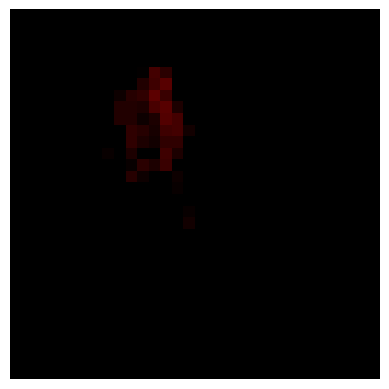

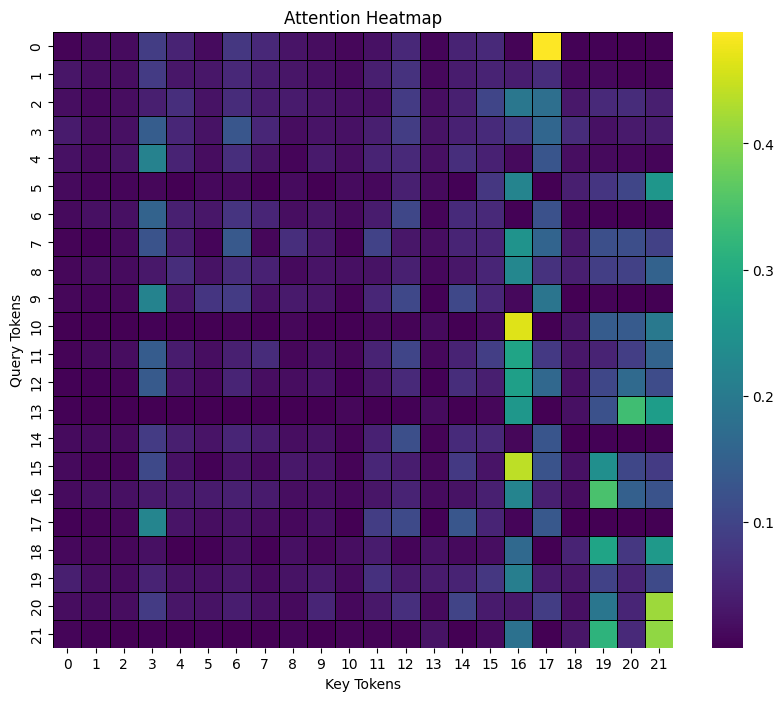

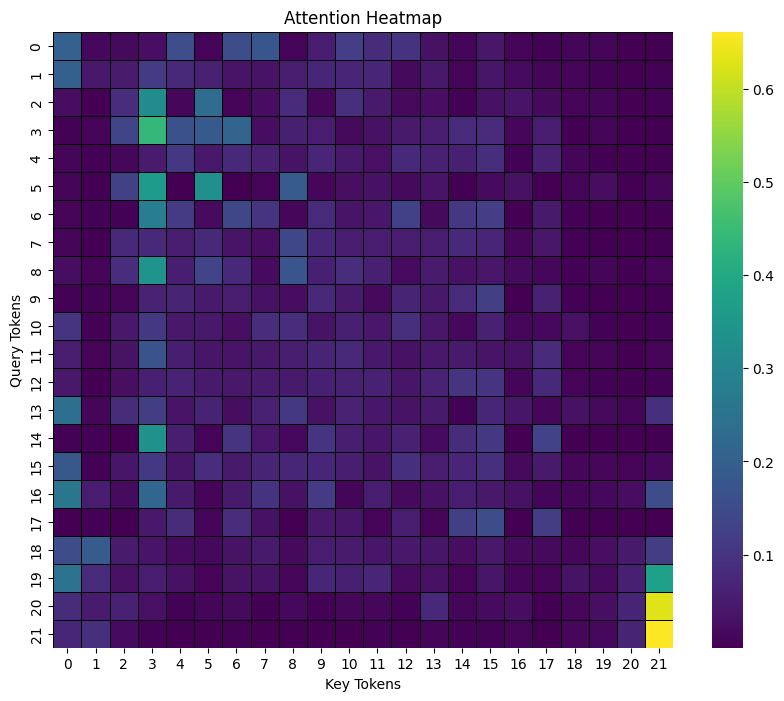

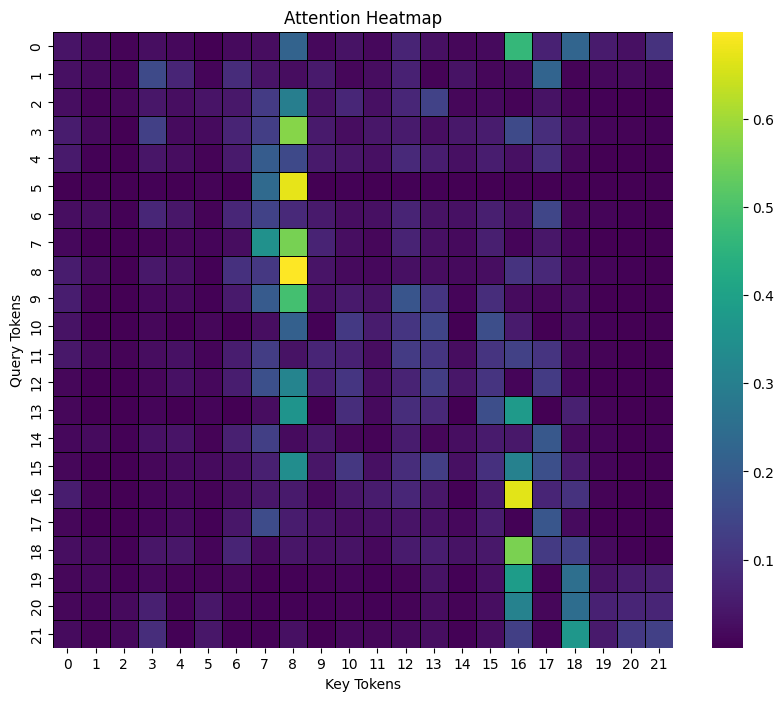

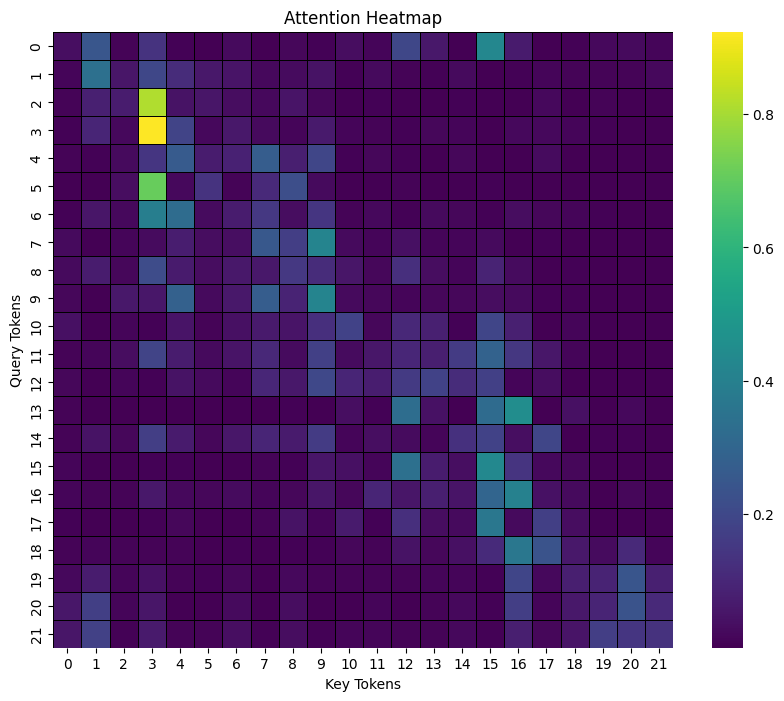

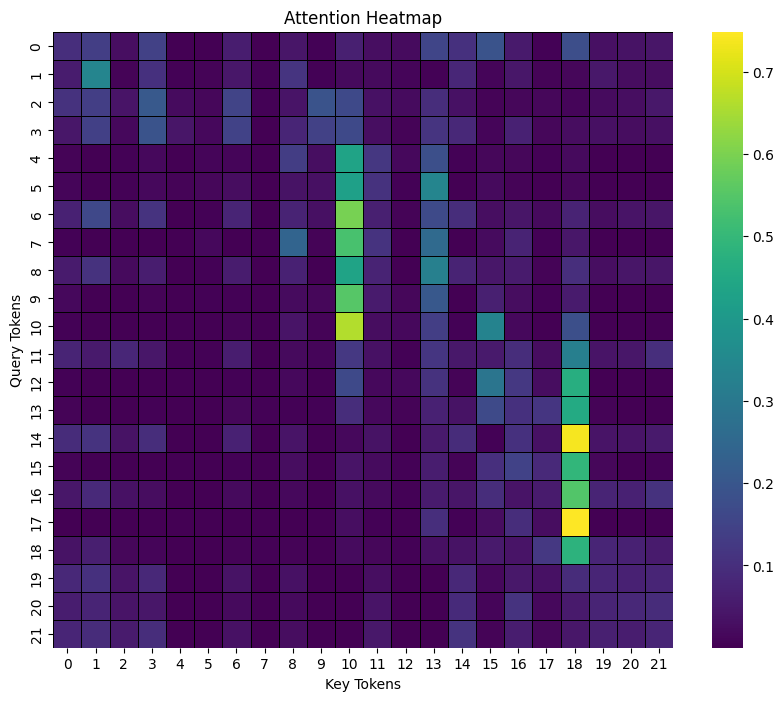

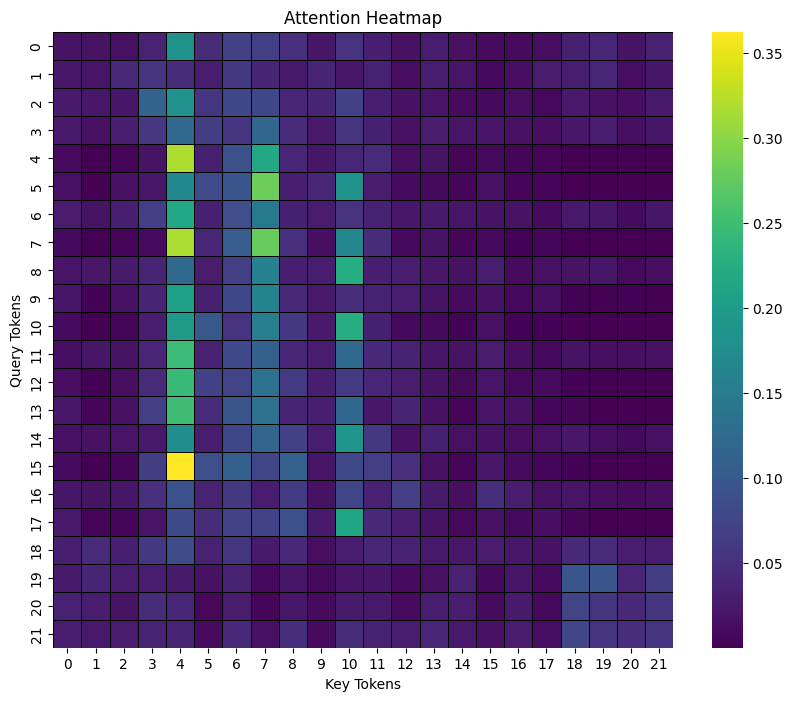

In [83]:
img_idx = 19

display_image(inputs,img_idx)
heat_map_display1(img_idx,90,1,3, scale_factor = 1)

<span style="color:red"><b>>>>>>>> remote</b></span>

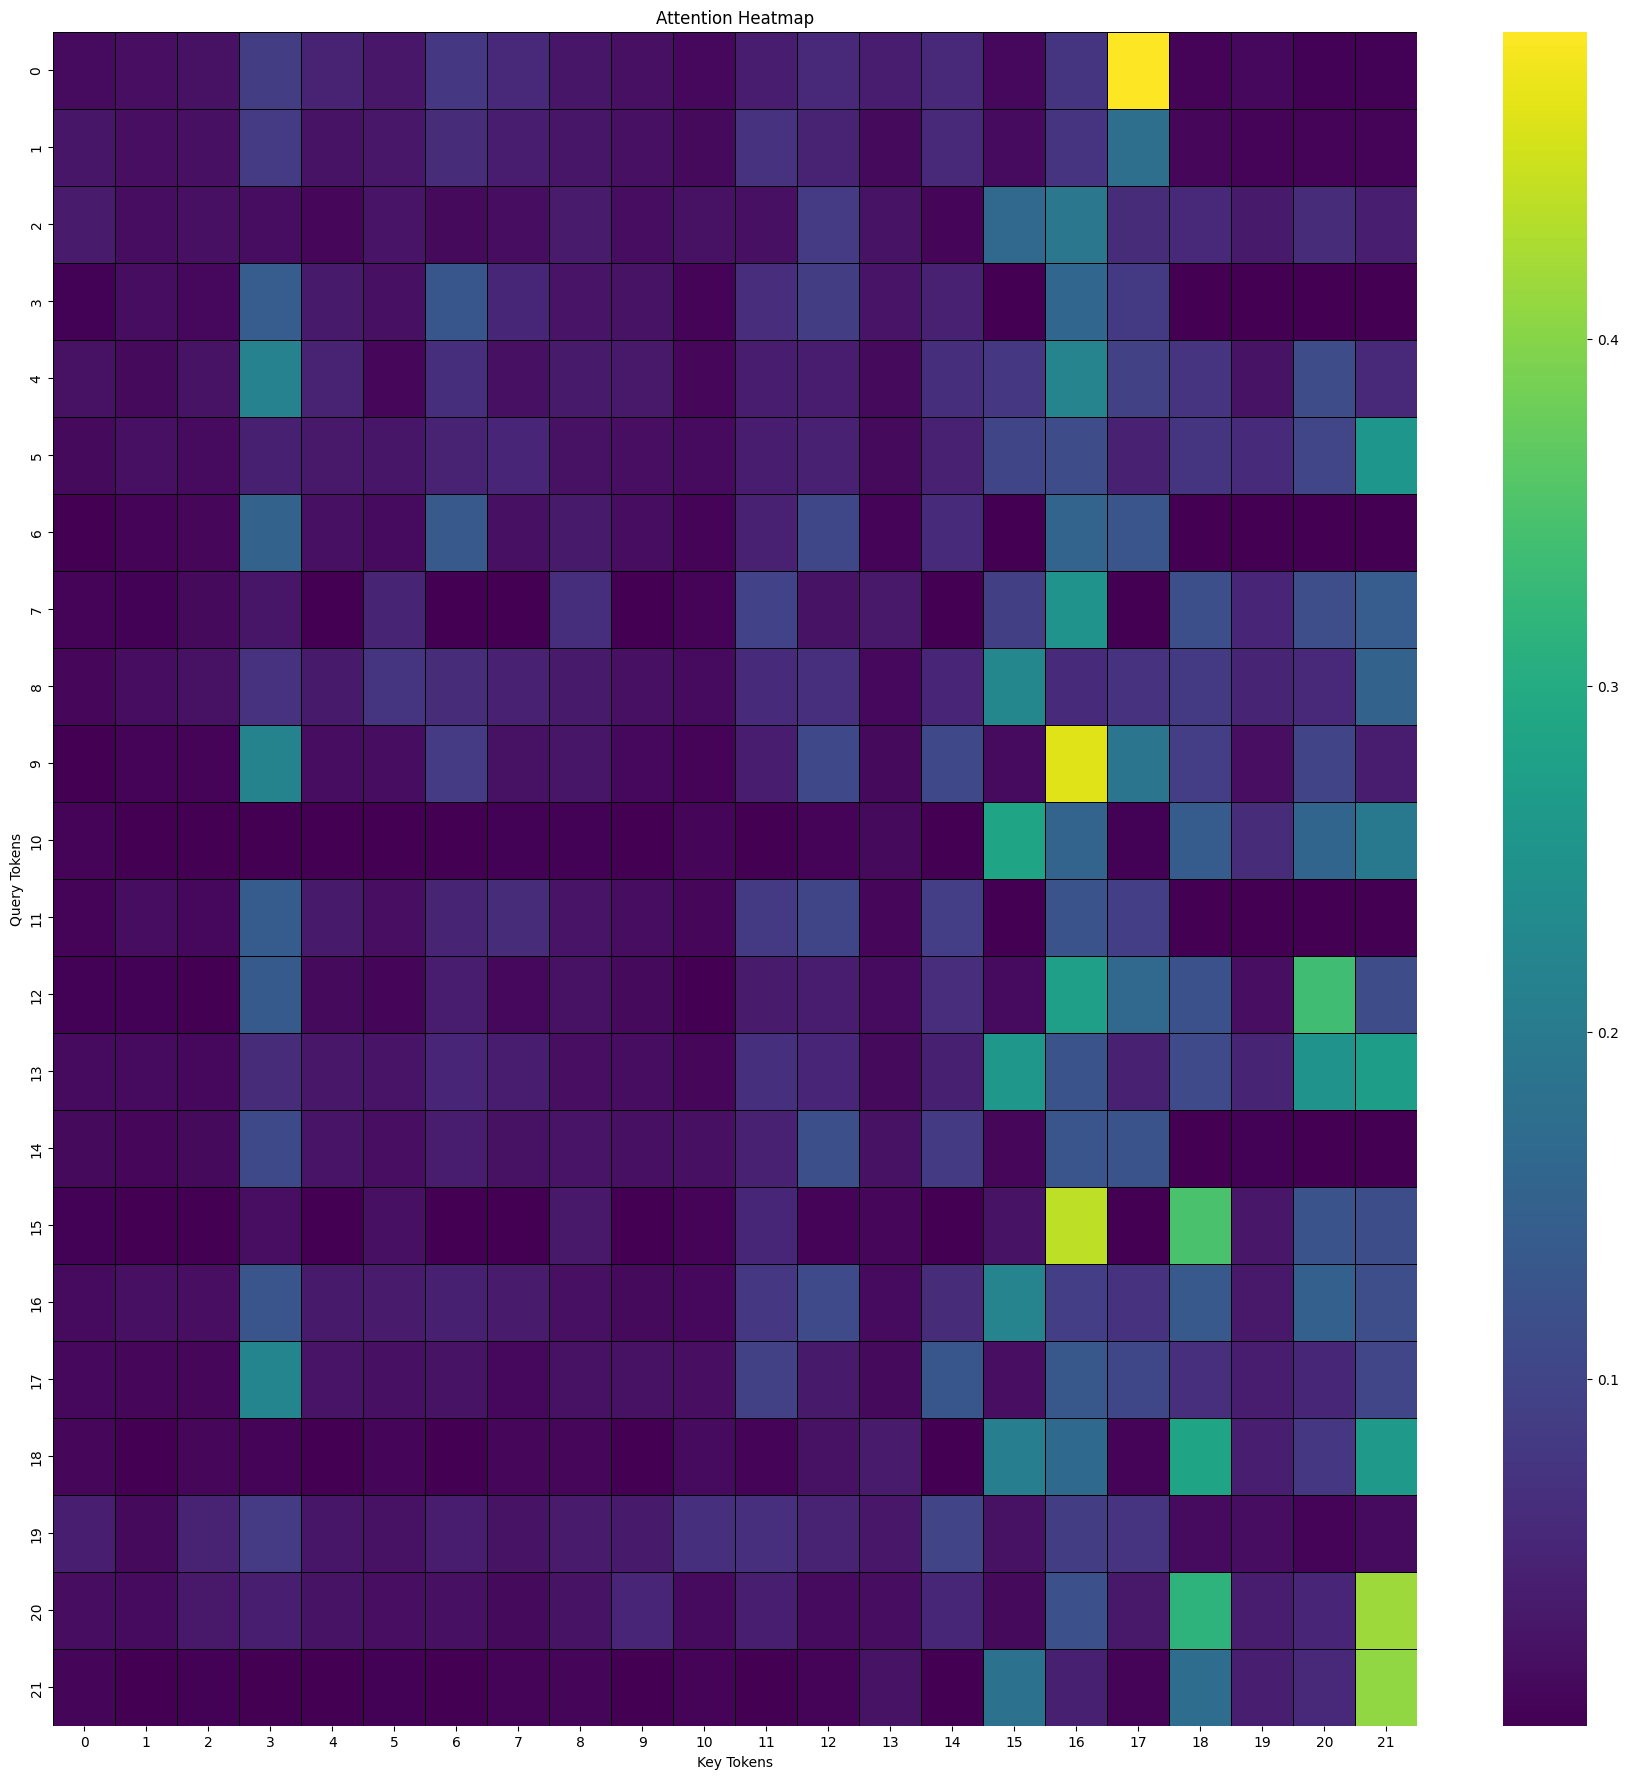

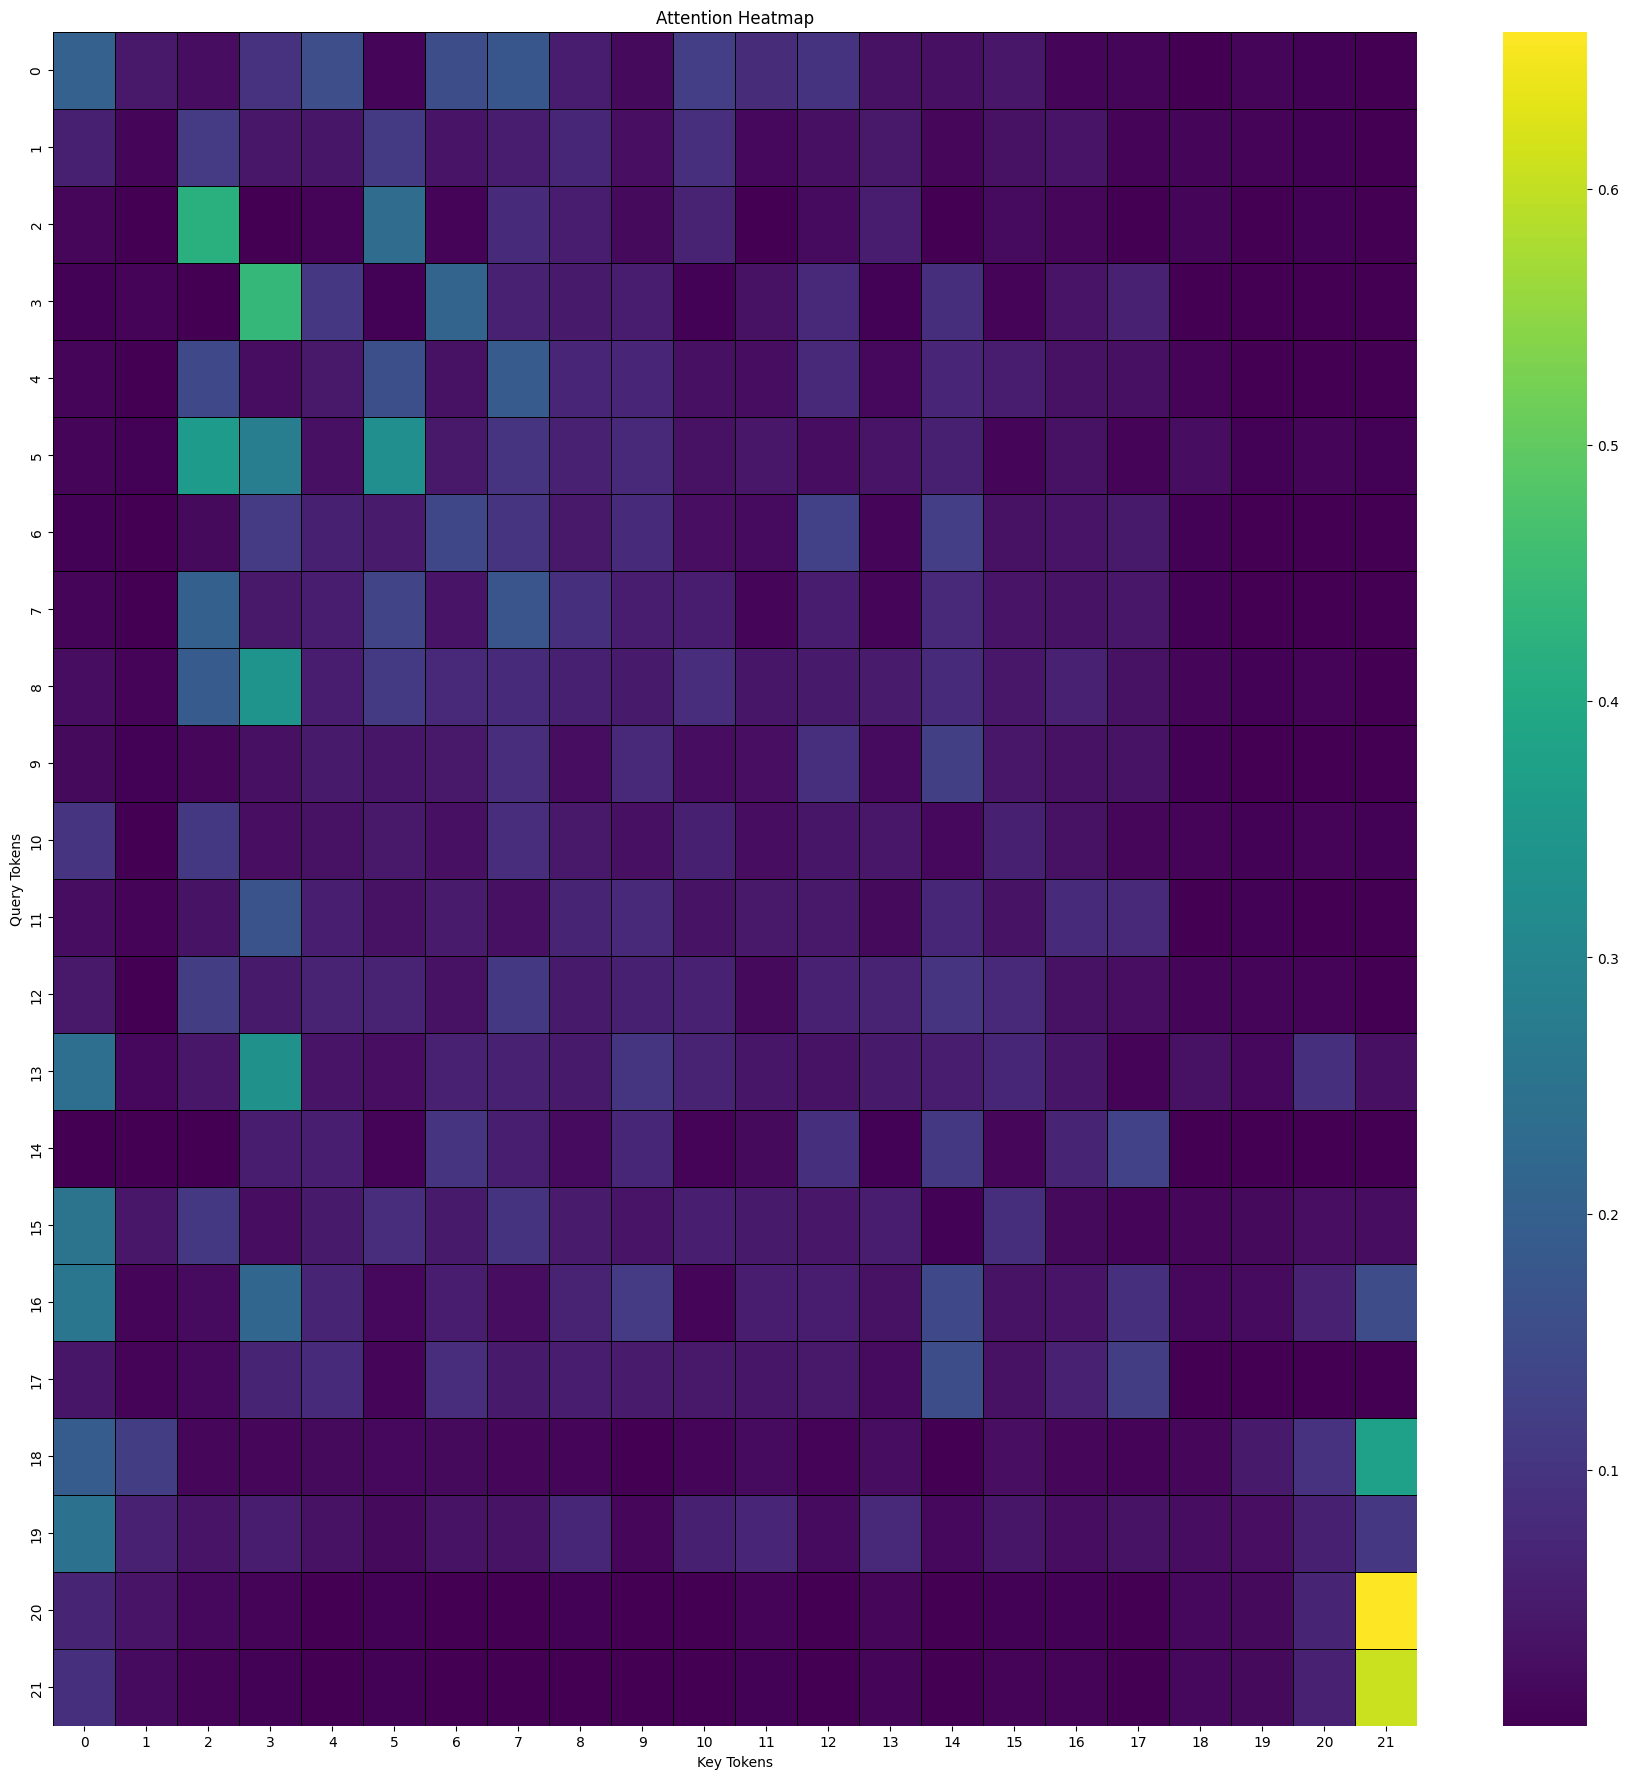

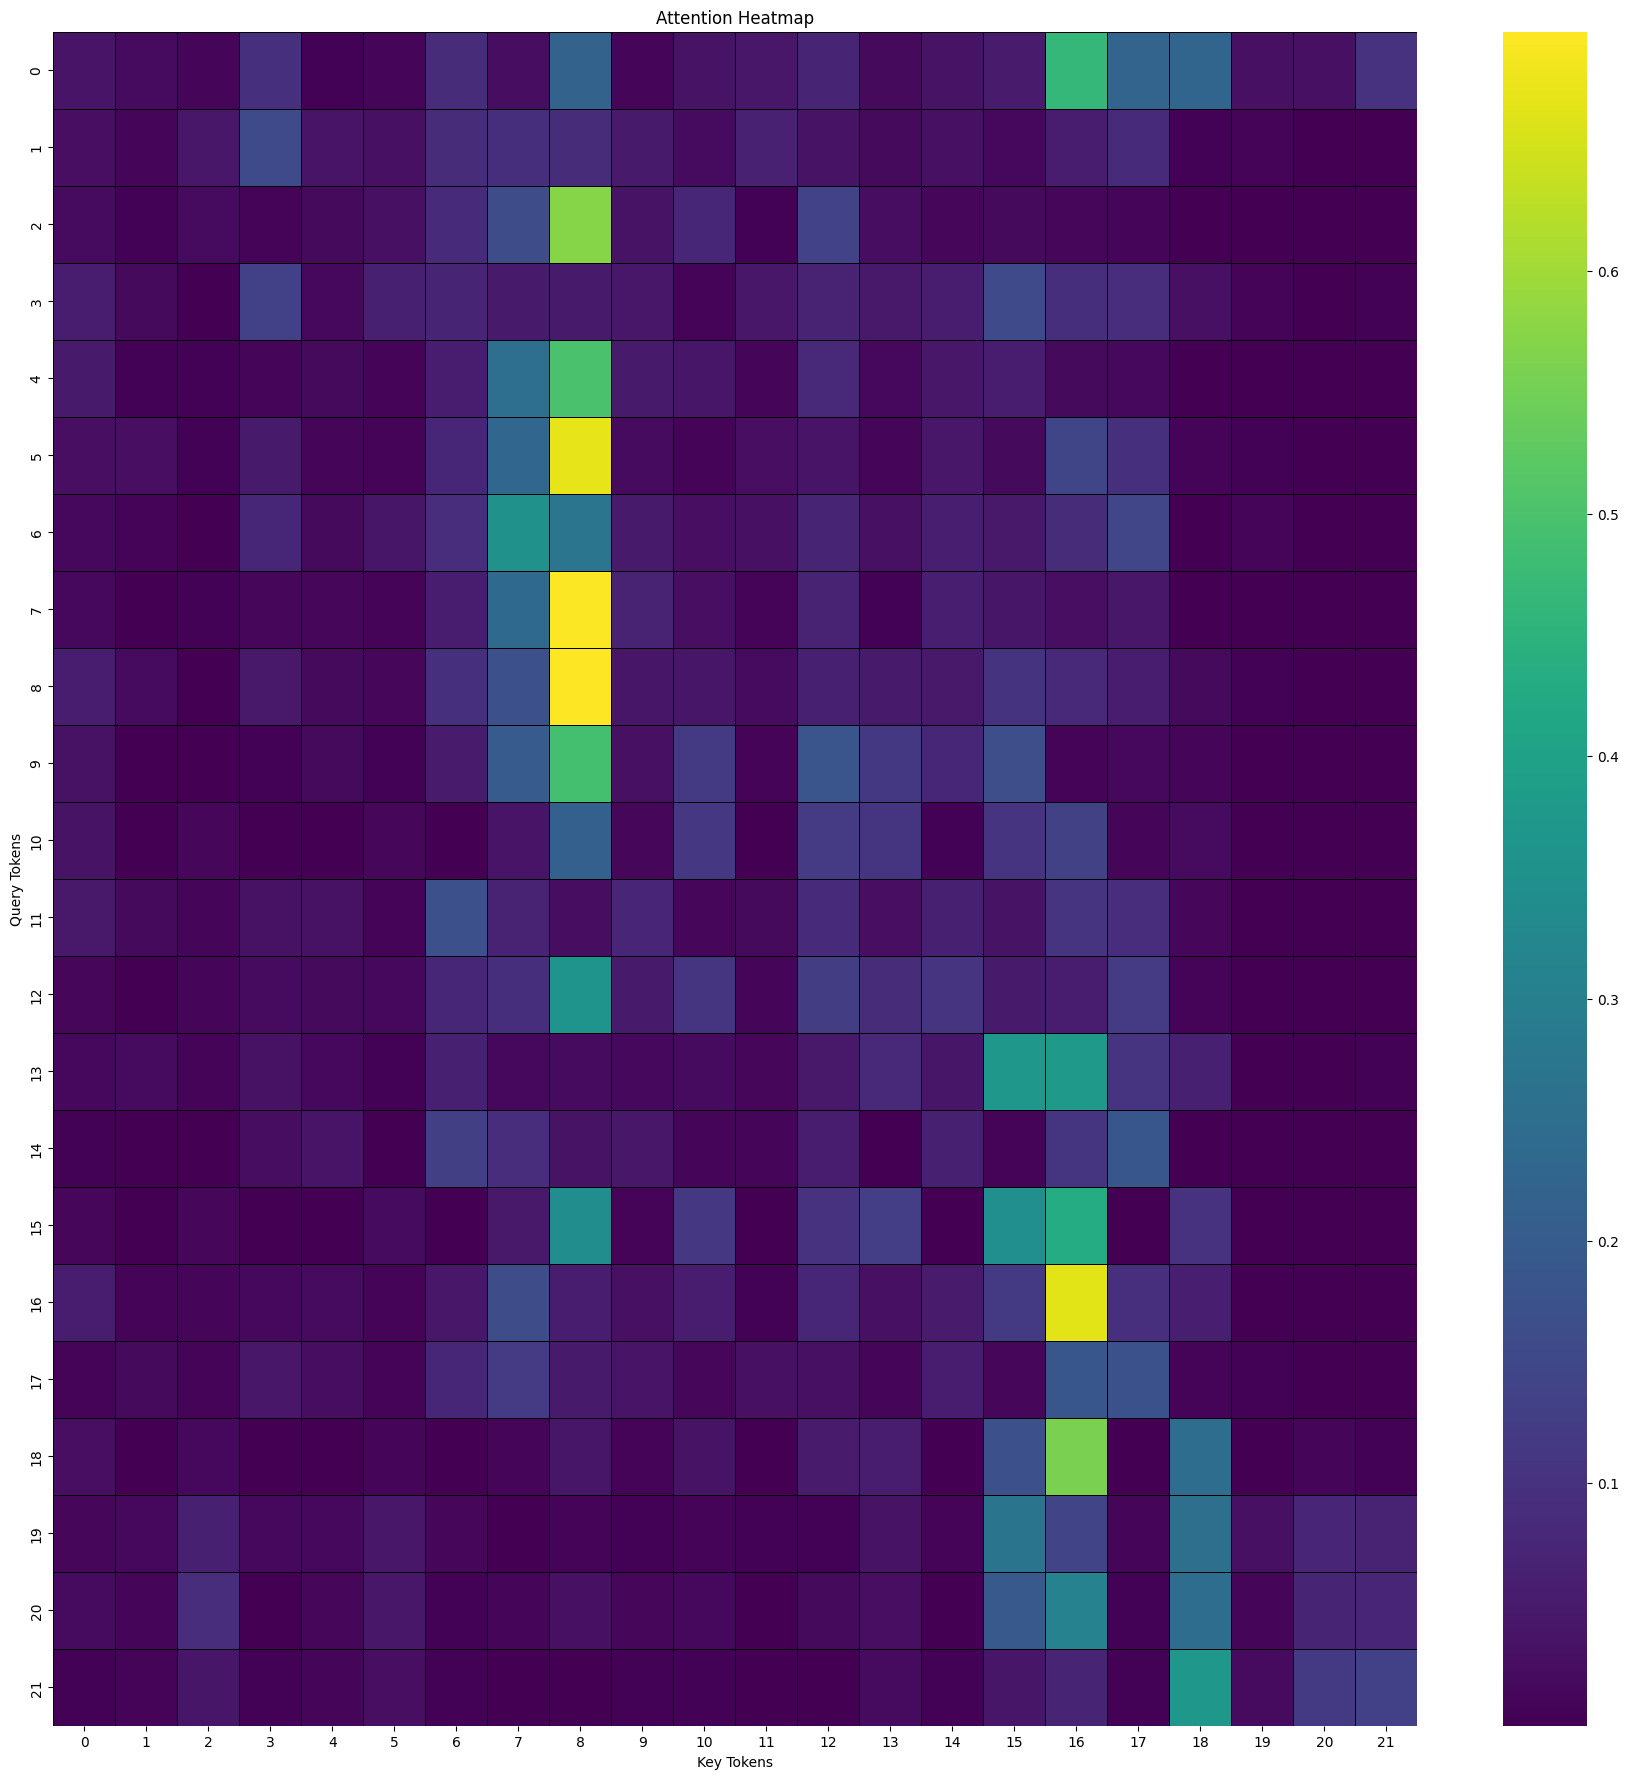

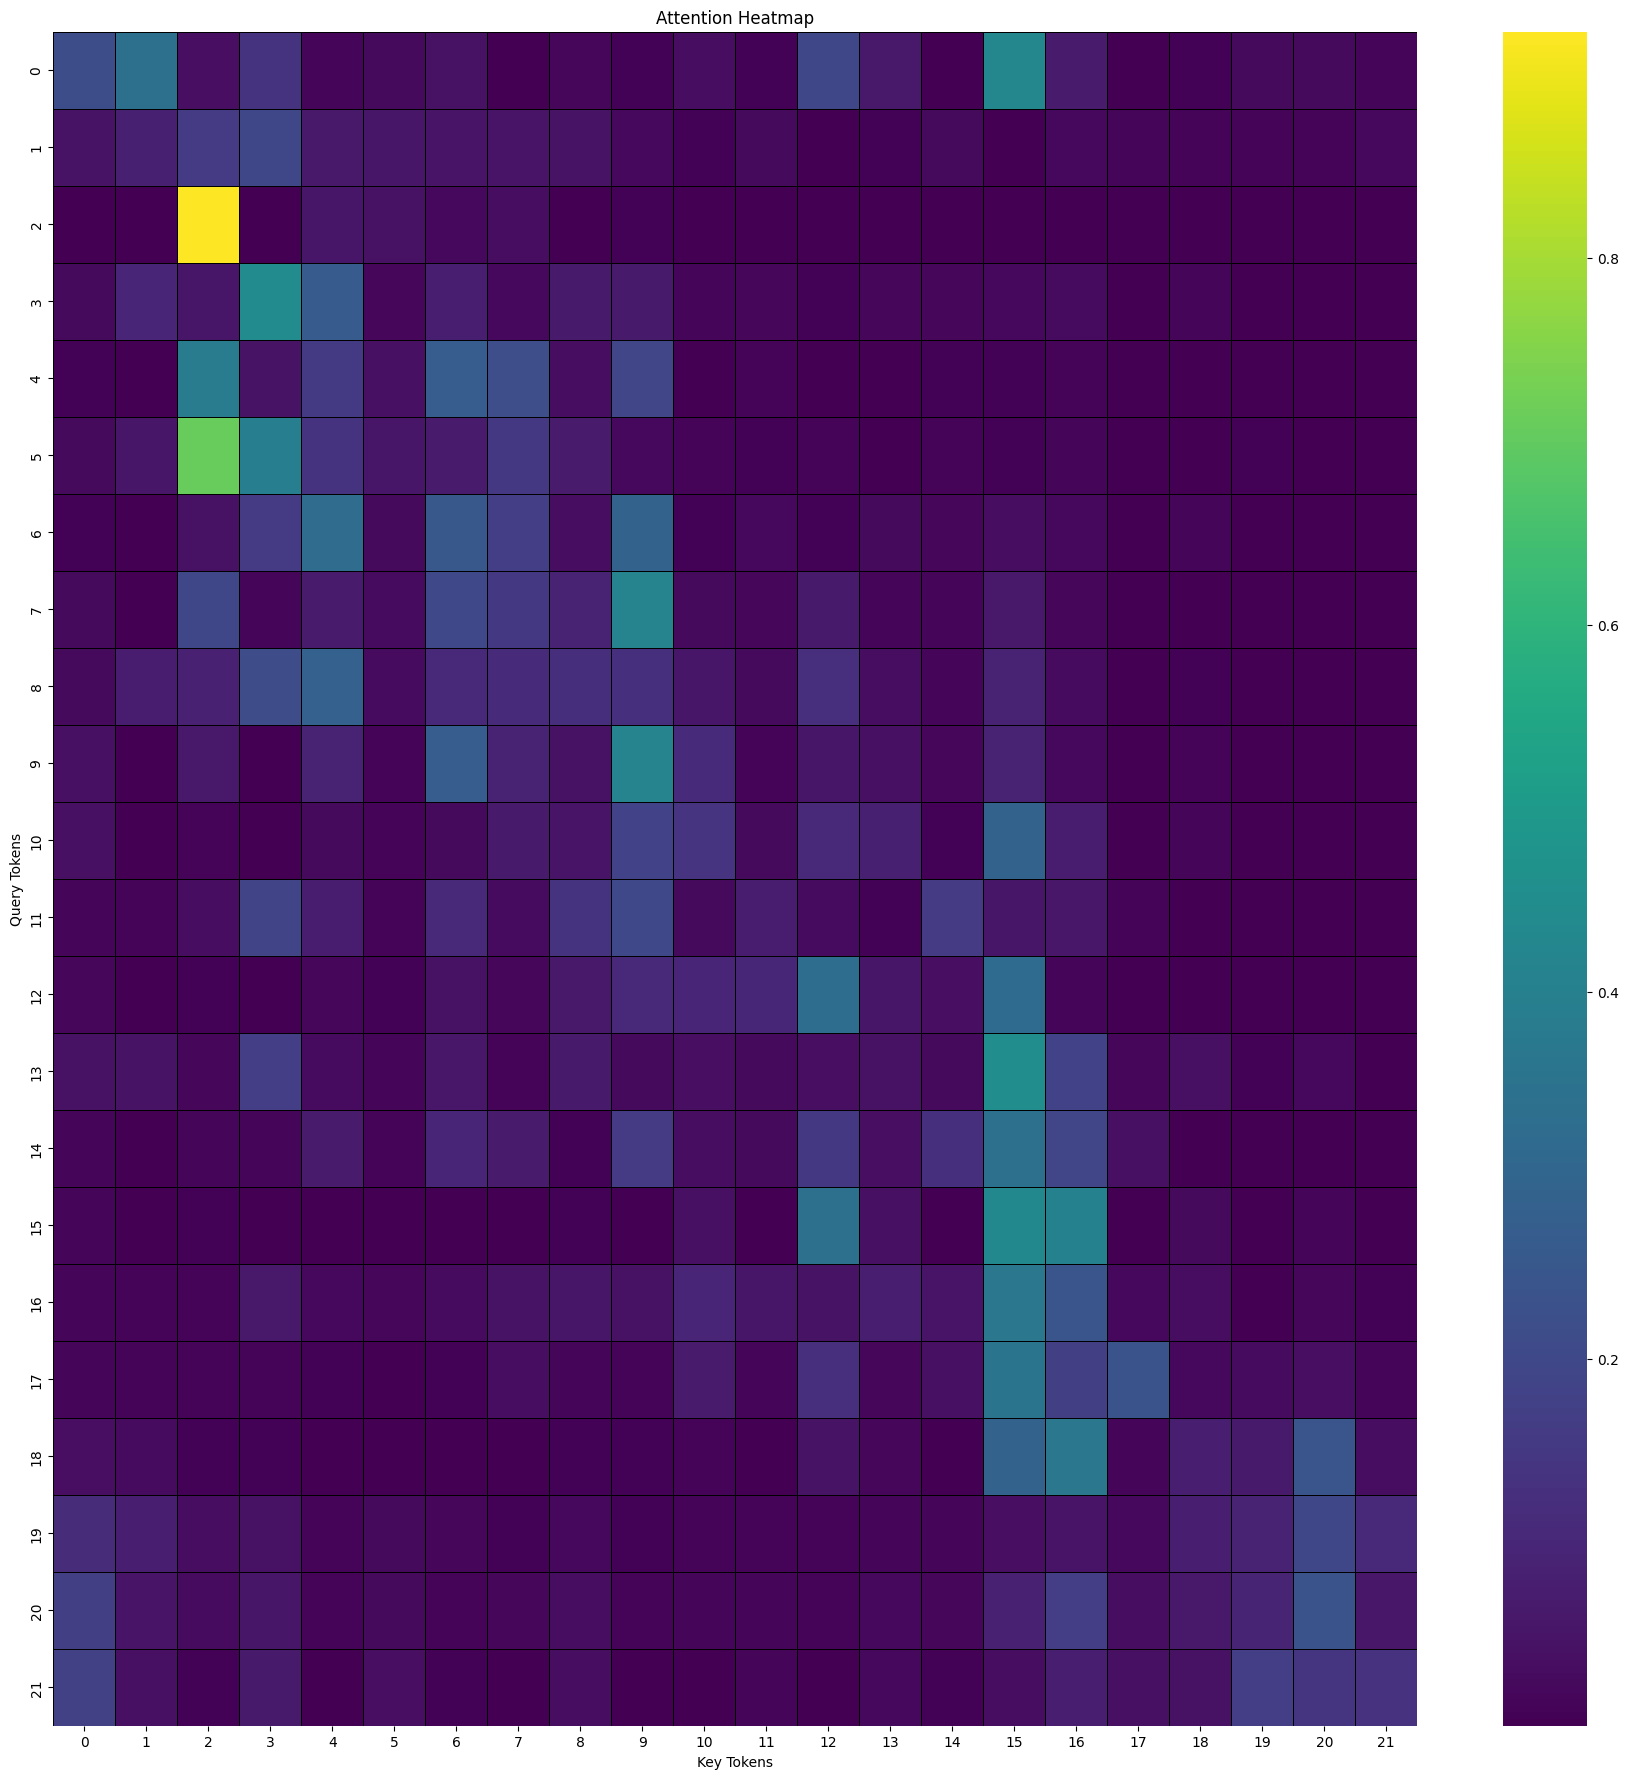

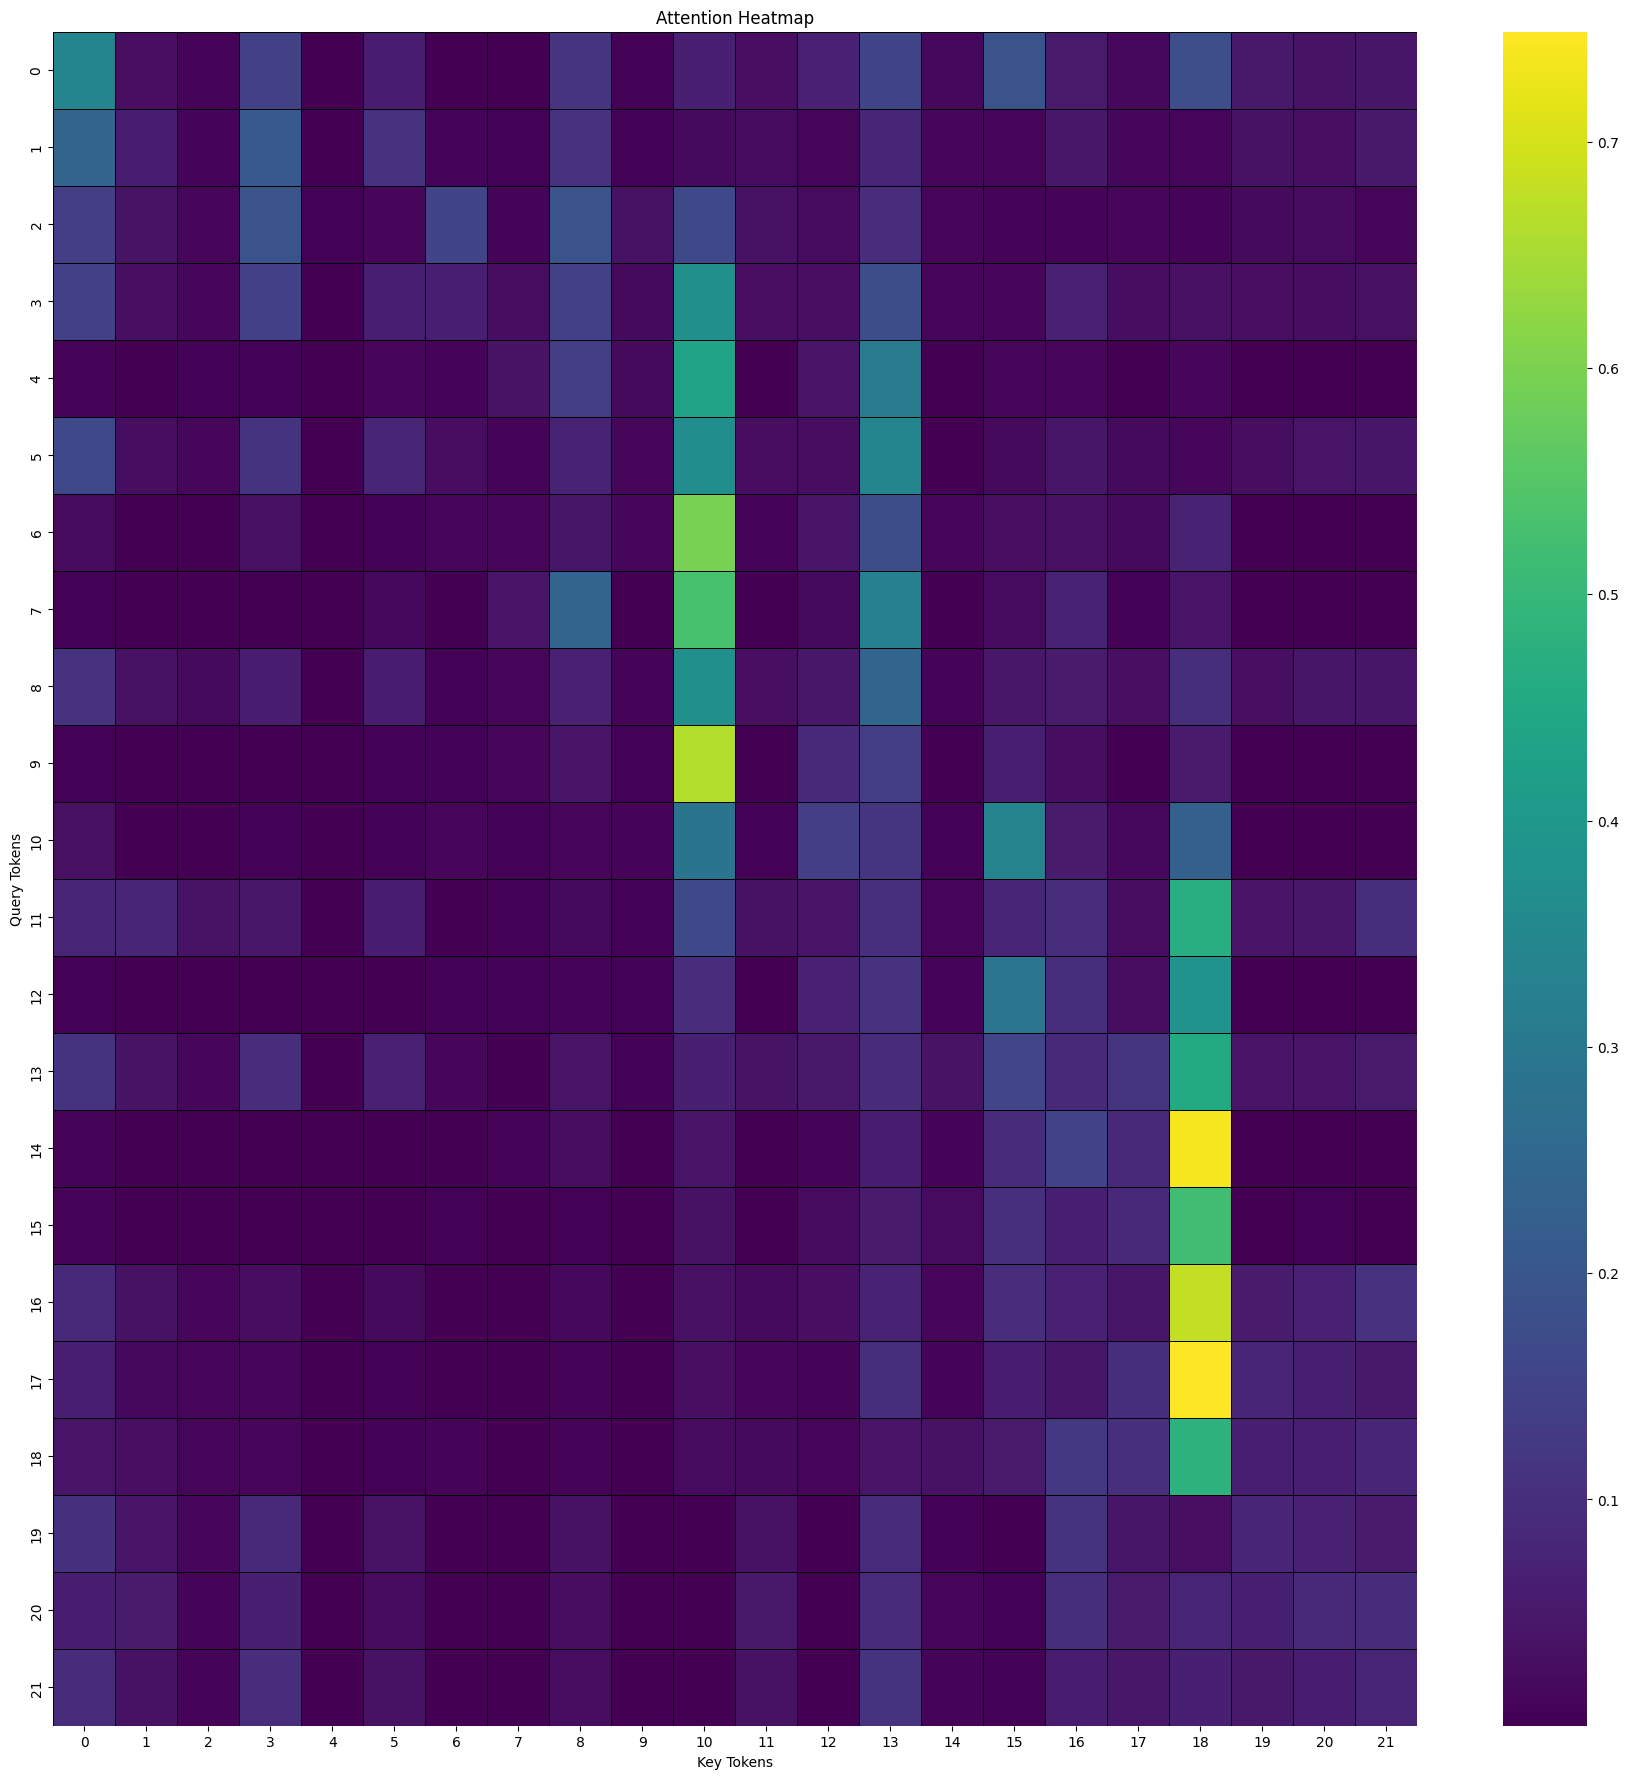

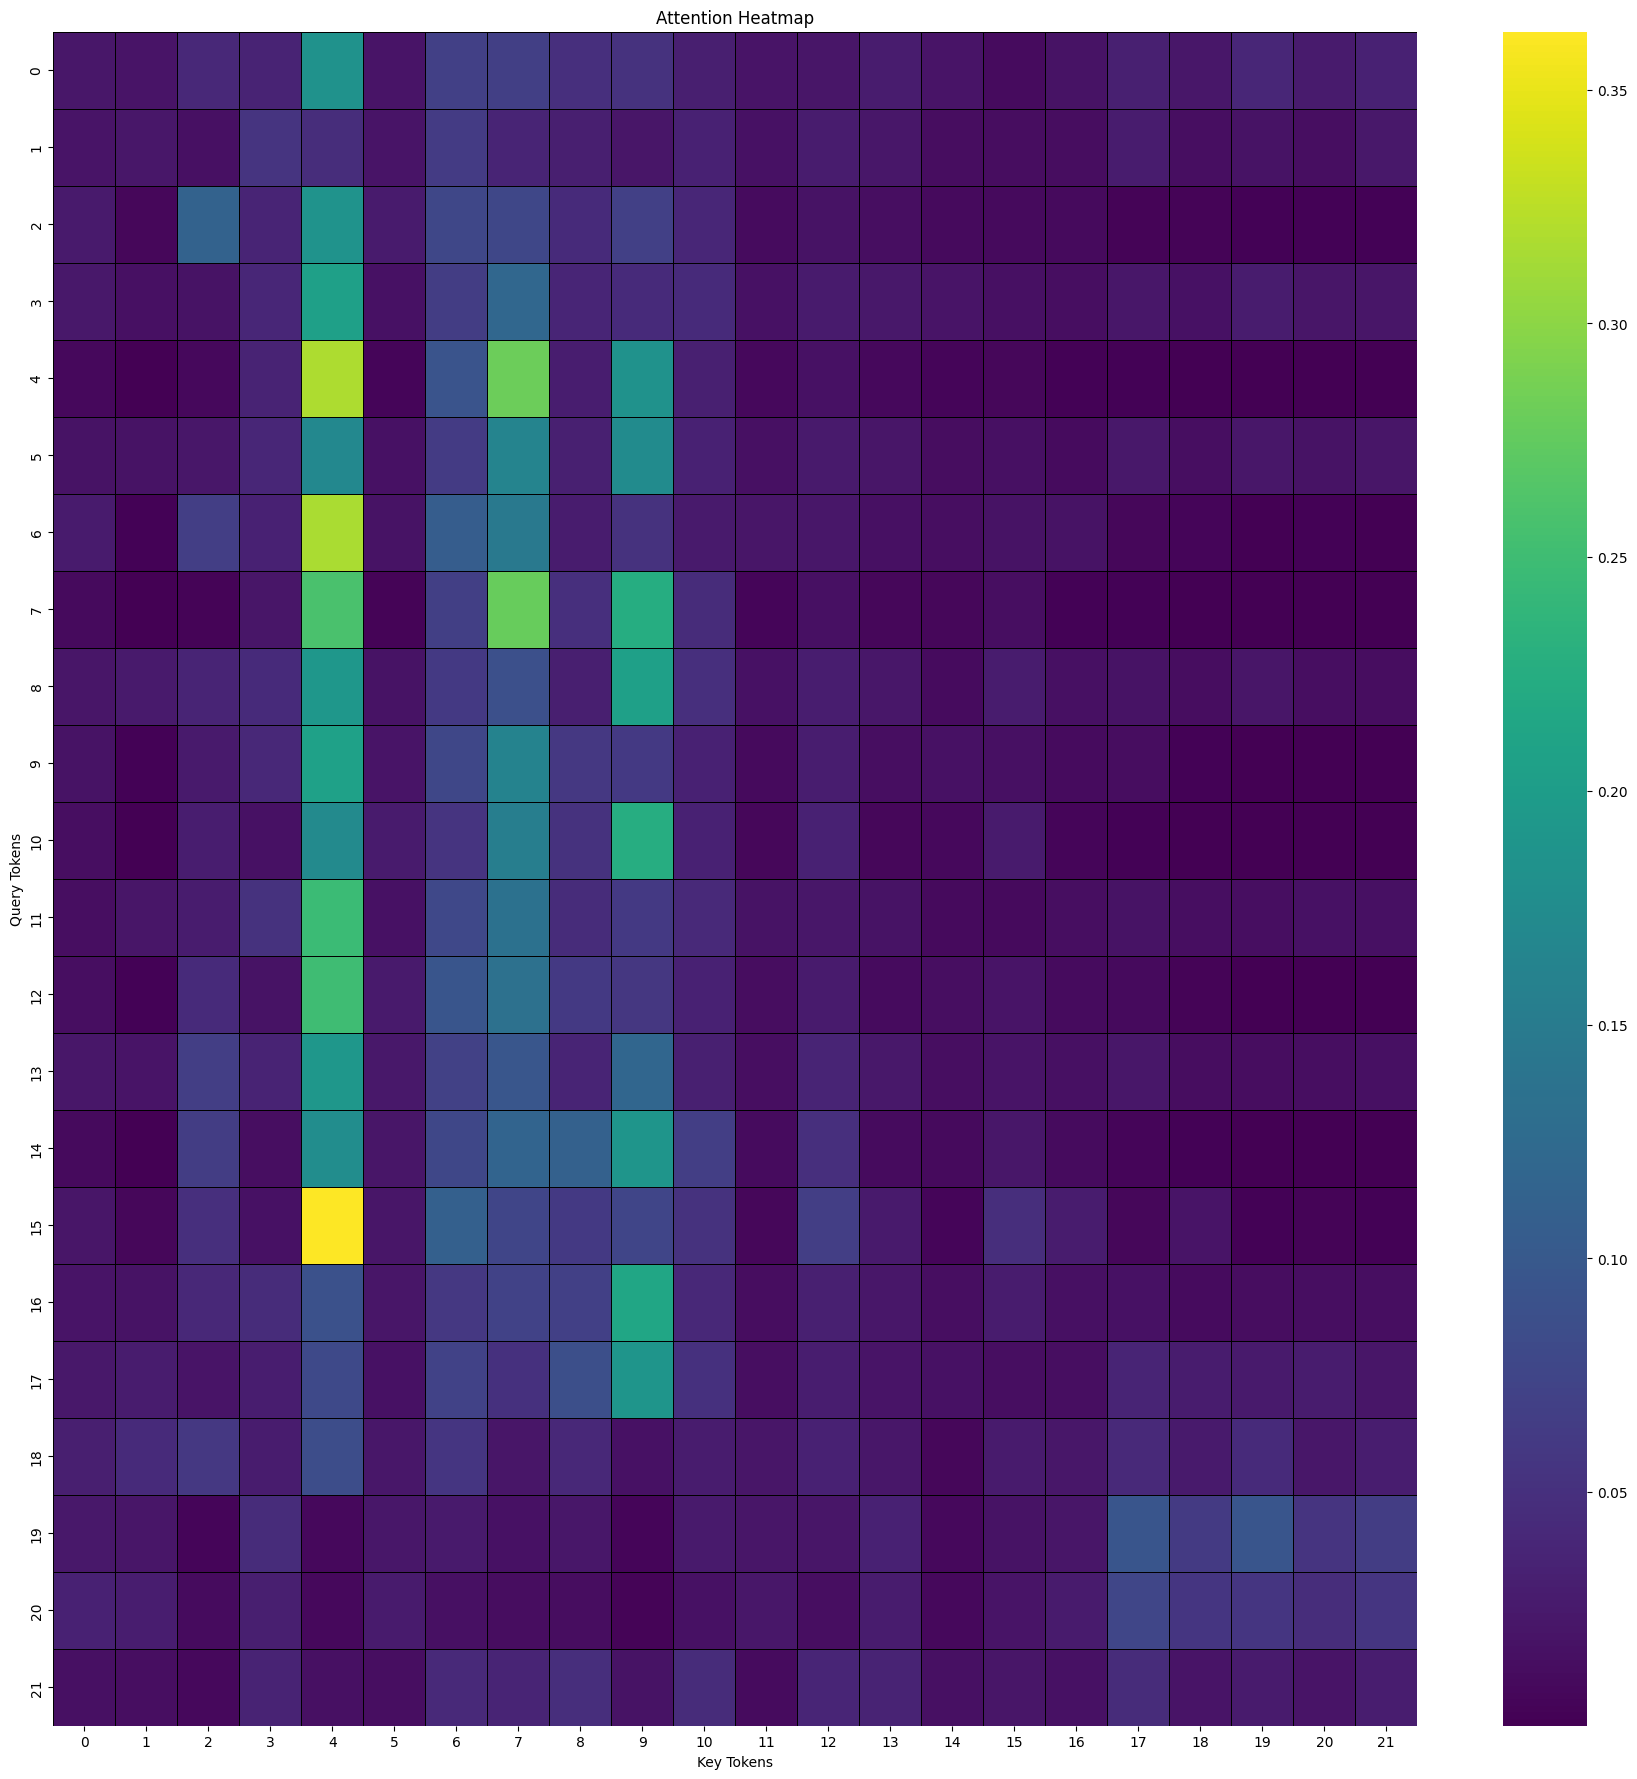

In [65]:
img_idx = 19

# display_image(inputs,img_idx)
heat_map_display(img_idx,90,1,3)

In [34]:
# inputs.shape

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


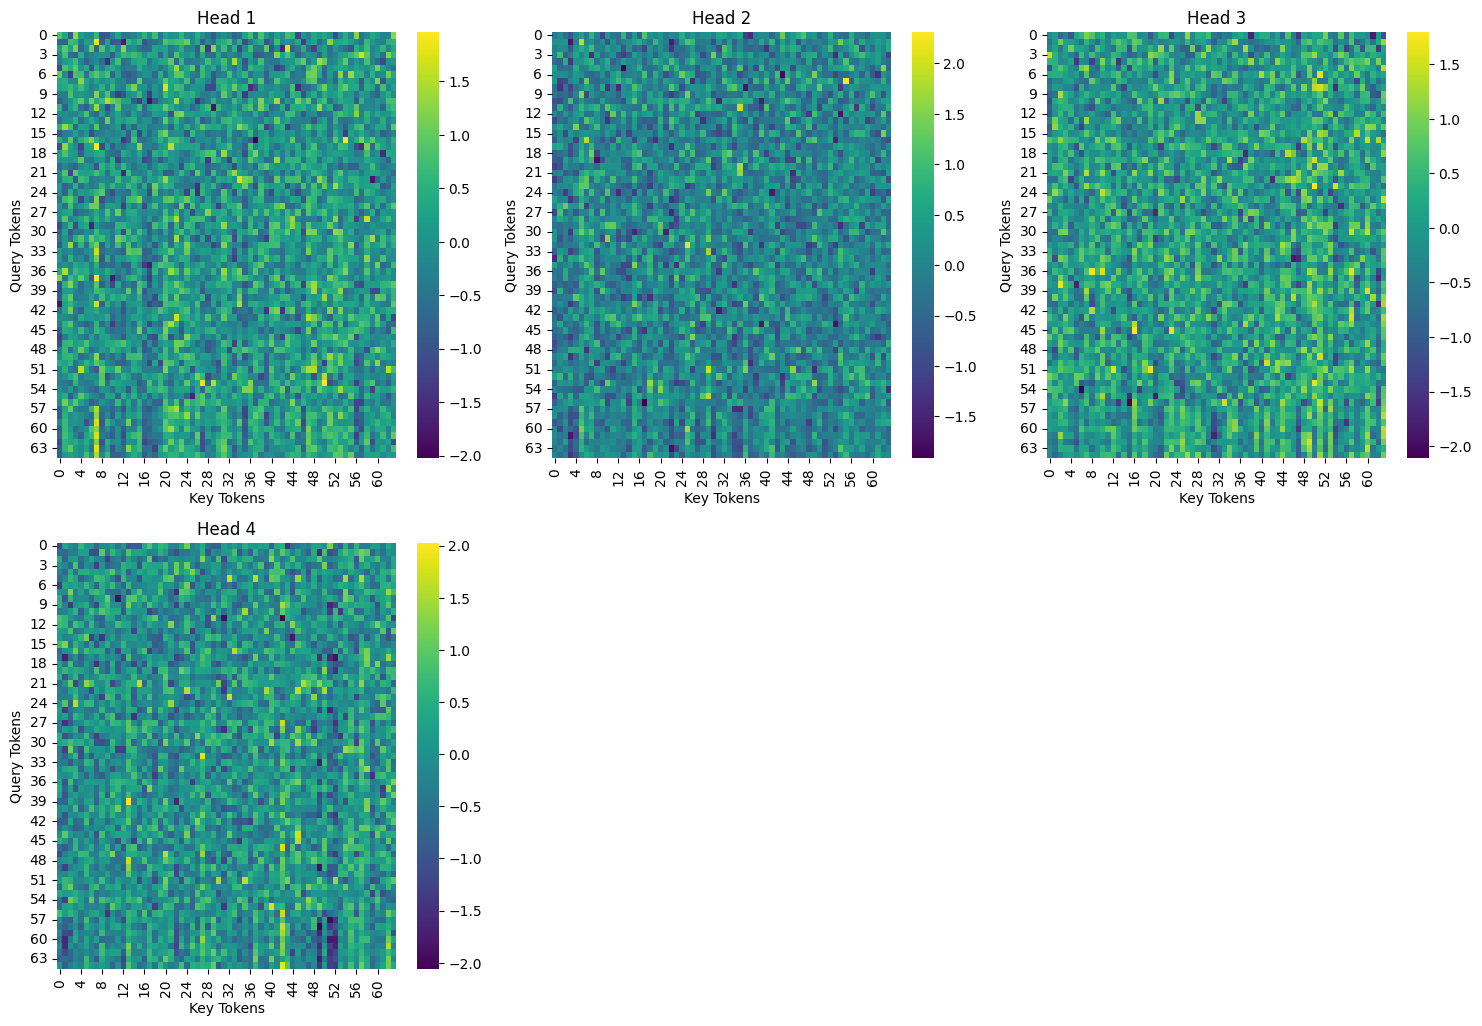

In [35]:
# heat_map(npy_data[5],img_idx = 3)

In [97]:
raise EOFError

EOFError: 

In [92]:
# EDA

In [101]:
type(data)

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


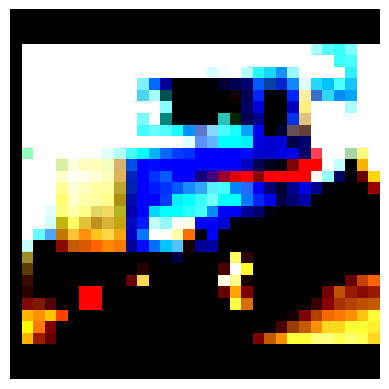

In [119]:
img_idx = 2
data = inputs[img_idx]
display_image(data)

In [111]:
data.shape

(3, 32, 32)

In [122]:
data.shape

(3, 32, 32)

In [129]:
from tqdm import tqdm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Plotting: 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]


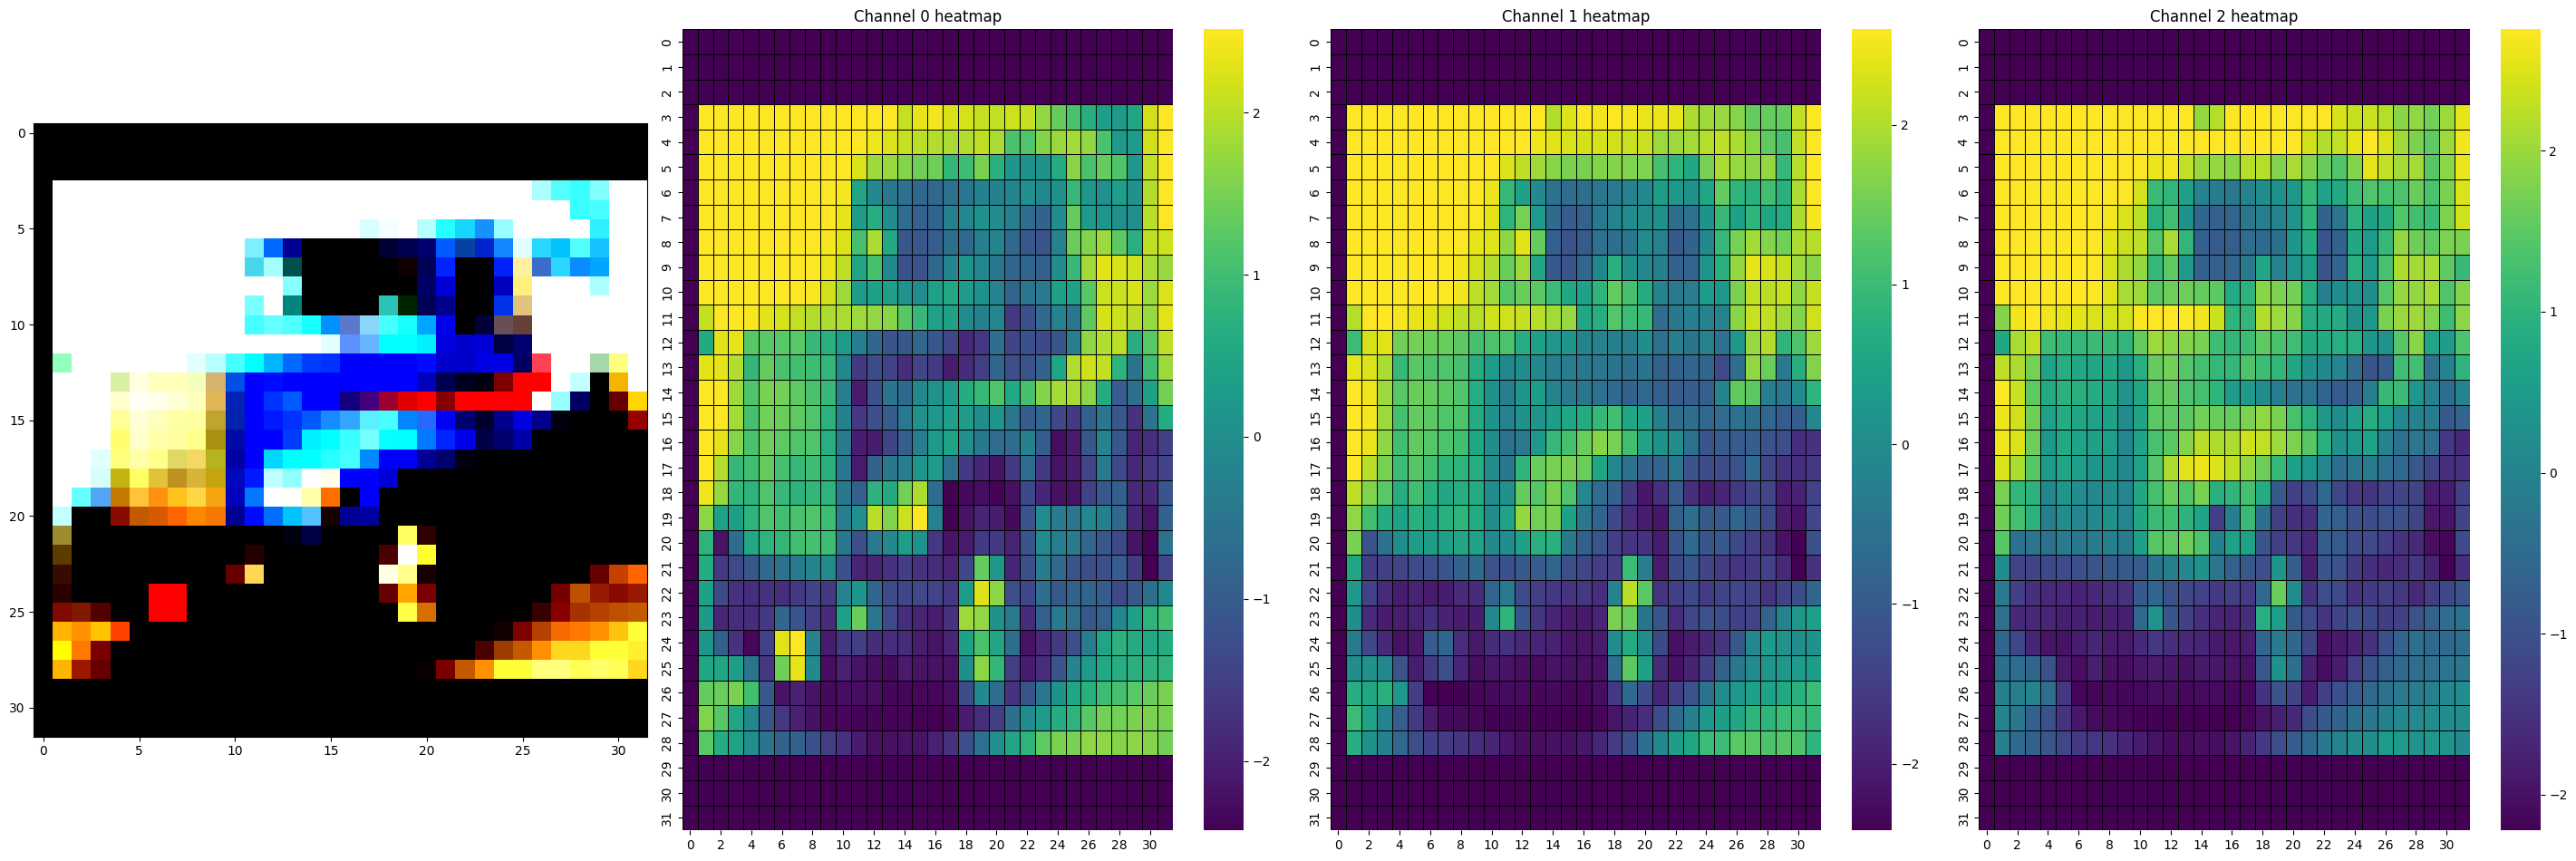

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

SCALE_FACTOR = 0.3

# Get the number of channels
num_channels = data.shape[0]

# Get the shape of a single channel
height, width = data[0].shape

# Calculate the figure size using the scale factor, adjusting for the number of channels
figsize = (width * SCALE_FACTOR * num_channels, height * SCALE_FACTOR)

# Create a figure with subplots, one for each channel
fig, axes = plt.subplots(1, num_channels+1, figsize=figsize)

image_display = np.transpose(data, (1, 2, 0))
axes[0].imshow(image_display)

for channel_idx in tqdm(range(num_channels), 'Plotting'):
    # Get the current channel's image
    channel_img = data[channel_idx]
    
    # Plot the heatmap on the corresponding subplot
    sns.heatmap(channel_img, cmap='viridis', annot=False, cbar=True, linewidths=0.5, linecolor='black', ax=axes[channel_idx+1])
    
    # Set the title for each subplot
    axes[channel_idx+1].set_title(f"Channel {channel_idx} heatmap")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [140]:
for i in npy_data:
    print(i.shape)

(20, 8, 65, 64)
(20, 8, 65, 65)
(20, 65, 512)
(20, 8, 65, 64)
(20, 8, 65, 64)
(20, 8, 65, 64)
